# Logistic Regression


## 1.환경준비

### (1) import

In [41]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings  # 경고메시지 제외

warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

In [42]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

## 2.데이터 준비

### (1) 데이터 정리

In [43]:
data.drop('EmployeeNumber', axis=1, inplace=True)

### (2) 데이터분할1 : x, y 나누기

In [44]:
# x와 y 분리
target = 'Attrition'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [45]:
cat_cols = ['Gender', 'JobSatisfaction', 'MaritalStatus', 'OverTime']
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)

### (5) 데이터분할2 : train : validation 나누기

In [46]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state=2022)

### (6) Scaling

## 3.모델링

### (1) 필요한 함수 불러오기

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

### (2) 선언

In [48]:
model = LogisticRegression()

### (3) 모델링(학습)

In [49]:
model.fit(x_train, y_train)

LogisticRegression()

* 모델의 coeficient, intercept 확인

In [50]:
model.coef_, model.intercept_

(array([[-3.92871013e-02,  3.79134710e-02, -6.15321713e-05,
         -2.75722277e-02, -4.28983771e-02,  2.30662583e-01,
         -2.19068913e-01, -1.05270449e-01, -3.11949133e-01,
         -4.12654272e-01,  8.42440437e-01,  1.26968077e+00]]),
 array([-0.03029727]))

In [51]:
x_train.columns.to_list()

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'Gender_Male',
 'JobSatisfaction_2',
 'JobSatisfaction_3',
 'JobSatisfaction_4',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_Yes']

### (4) 검증 : 예측

In [52]:
pred = model.predict(x_val)

### (5) 검증 : 평가

In [53]:
# 정분류율
accuracy_score(y_val, pred)

0.8551532033426184

In [54]:
mean_squared_error(y_val, pred, squared=True)

0.14484679665738162

In [55]:
mean_squared_error(y_val, pred, squared=False)

0.38058743628420216

In [56]:
mean_absolute_error(y_val, pred)

0.14484679665738162

In [57]:
mean_absolute_percentage_error(y_val,pred)

87813920310845.45

## 4.분류 모델 평가

### (1) Confusion Matrix
https://en.wikipedia.org/wiki/Confusion_matrix

In [58]:
confusion_matrix(y_val, pred)

array([[293,   7],
       [ 45,  14]], dtype=int64)

### (2) classification_report
* 분류문제 평가지표 종합판
* print 문으로 결과를 출력해야 제대로 보임.

In [59]:
classification_report(y_val, pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.98      0.92       300\n           1       0.67      0.24      0.35        59\n\n    accuracy                           0.86       359\n   macro avg       0.77      0.61      0.63       359\nweighted avg       0.83      0.86      0.83       359\n'

In [60]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       300
           1       0.67      0.24      0.35        59

    accuracy                           0.86       359
   macro avg       0.77      0.61      0.63       359
weighted avg       0.83      0.86      0.83       359



### (3) 다양한 성능평가 함수들 

In [61]:
# 정분류율
accuracy_score(y_val, pred)

0.8551532033426184

In [62]:
# 정밀도
print(precision_score(y_val, pred, pos_label=0))
print(precision_score(y_val, pred, pos_label=1))

0.8668639053254438
0.6666666666666666


In [63]:
# 재현율
print(recall_score(y_val, pred, pos_label=0))
print(recall_score(y_val, pred, pos_label=1))

0.9766666666666667
0.23728813559322035


In [64]:
# f1_score
print(f1_score(y_val, pred, pos_label=0))
print(f1_score(y_val, pred, pos_label=1))

0.9184952978056425
0.35


### (참조) cut-off에 따른 성능 그래프 : precision recall curve

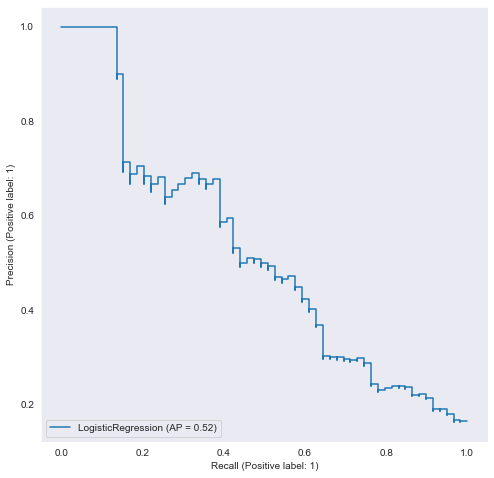

In [65]:
plt.figure(figsize=(8, 8))
pr_curve = plot_precision_recall_curve(model, x_val, y_val, ax=plt.gca())
plt.grid()
plt.show()
# ax = plt.gca() 옵션은, plt.#### 함수들을 함께 사용할 수 있게 해줍니다.

plot_precision_recall_curve의 결과를 저장하고  
.average_precision 속성을 불러오면, 계산된 아래 면적을 알 수 있습니다.

In [66]:
pr_curve.average_precision

0.5203889114025759

## 5.실습 : 이동통신 가입 고객 이탈 예측

* 여러분은 OO 통신회사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


In [67]:
model_desc, RMSE, MAE, MAPE = [], [], [], []

### (1) 데이터 전처리

In [141]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [142]:
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


`* 변수정리 : 불필요한 변수를 정리합시다.
    * 식별자 : 일련번호, 주민번호, 전화번호, 고객ID, 사번 
    * 시계열 데이터 중 : 어떤 기간동안 거의 변화가 없는 값.(변동이 거의 없는) 값.


In [143]:
drop_cols = ['id']
data.drop(drop_cols, axis=1, inplace=True)

* x, y 분할

In [144]:
target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

* 가변수화 

In [145]:
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)
x

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,153252,0,23,368403,597,1,6,0,0,1,0,0,1,0,0,0,0,0,0
19996,1,107126,71,82,237397,609,5,2,0,0,1,0,0,0,0,1,0,0,1,0
19997,0,78529,0,66,172589,275,0,2,0,1,0,0,0,0,1,0,1,0,0,0
19998,0,78674,47,41,572406,288,4,2,0,0,0,1,0,1,0,0,1,0,0,0


* train, val 분할

In [146]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

### (2) 모델링 : 로지스틱 회귀
* 로지스틱 회귀 모델을 만들고
* 성능 평가를 해 봅시다.

In [147]:
model = LogisticRegression()

In [148]:
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([[-4.06449091e-06, -3.24394387e-06, -5.94876448e-03,
         -7.07341208e-04,  1.94639892e-06, -3.58011419e-04,
         -5.58707443e-04, -9.33402917e-06,  1.06106824e-06,
         -3.30798954e-06, -1.47071789e-07, -3.39002694e-06,
         -3.27192584e-07,  2.19093384e-07, -3.06448068e-06,
         -1.38656321e-06, -5.72603190e-07, -5.15975992e-09,
         -1.41227964e-06, -8.12709127e-07]]),
 array([-4.54004382e-06]))

In [149]:
pred = model.predict(x_val)

In [150]:
accuracy_score(y_val, pred)

0.6263333333333333

In [152]:
confusion_matrix(y_val, pred)

array([[1827, 1180],
       [1062, 1931]], dtype=int64)

In [154]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       LEAVE       0.63      0.61      0.62      3007
        STAY       0.62      0.65      0.63      2993

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000



### (3) 모델링 : KNN
* 스케일링을 수행
* KNeighborsClassifier 를 불러와서 모델링
* 성능 평가를 해 봅시다.

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

model = KNeighborsClassifier()
scaler = MinMaxScaler()

In [156]:
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

model.fit(x_train_s, y_train)

KNeighborsClassifier()

In [157]:
pred = model.predict(x_val_s)

In [158]:
accuracy_score(y_val, pred)

0.5943333333333334